<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/ML/PCA/PCA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
### Python Data Science Handbook 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 来可视化一个包含 200 个数据点的二维数据集

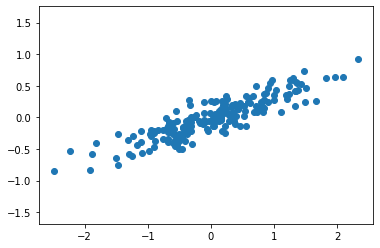

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

### 一种量化两变量间关系的方法是在数据中找到一组主
### 轴，并用这些主轴来描述数据集
##### 指标中最重要的是“成分”和“可解释差异”

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
#PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
 print(pca.explained_variance_)

[0.7625315 0.0184779]


### 用“成分”定义向量的方向，将“可解释差异”作为向量的平方长度

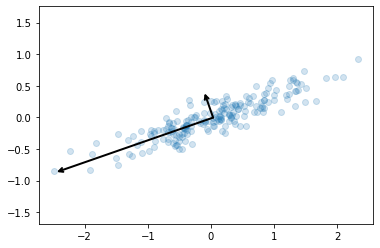

In [ ]:
def draw_vector(v0, v1, ax=None):
   ax = ax or plt.gca()
   arrowprops=dict(arrowstyle='->',
   linewidth=2,
   shrinkA=0, shrinkB=0)
   ax.annotate('', v1, v0, arrowprops=arrowprops)
# 画出数据
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### 1. 用PCA降维

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


### 进行数据降维的逆变换，并且与原始数据一起画出

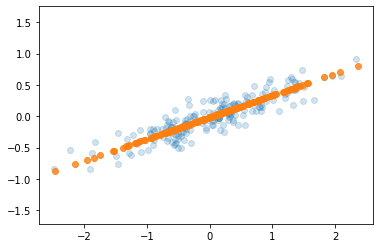

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### 2. 用PCA作数据可视化：手写数字

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
pca = PCA(2) # 从64维投影至二维
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


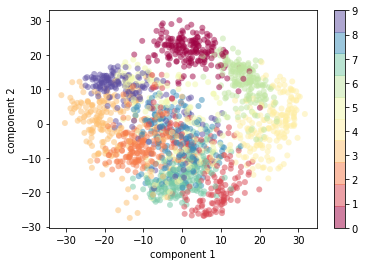

In [ ]:
plt.scatter(projected[:,0],projected[:,1],
       c=digits.target, edgecolor='none', alpha=0.5,
       cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 选择成分的数量


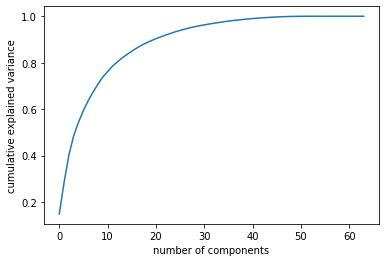

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### 无噪音的输入数据

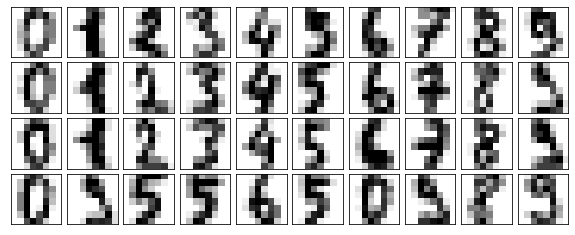

In [ ]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4),
  subplot_kw={'xticks':[], 'yticks':[]},
  gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
   ax.imshow(data[i].reshape(8, 8),
    cmap='binary', interpolation='nearest',
    clim=(0, 16))
plot_digits(digits.data)

### 噪音数据集

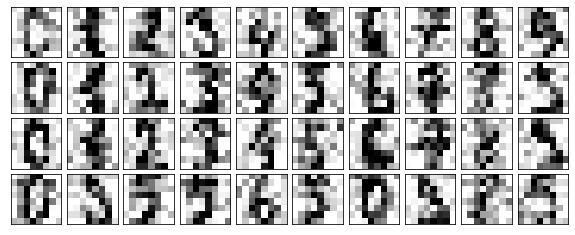

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

### 用噪音数据训练一个 PCA，要求投影后保存 50% 的方差：

#### 50% 的方差对应 12 个主成份

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

### 利用逆变换重构过滤后的手写数字

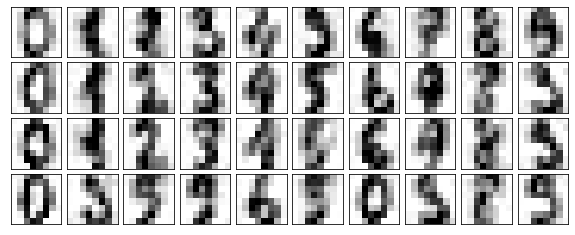

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### 这个信号保留 / 噪音过滤的性质使 PCA 成为一种非常有用的特征选择
### 方式。例如，与其在很高维的数据上训练分类器，你可以选择在一个低
### 维表示中训练分类器，该分类器将自动过滤输入数据中的随机噪音。